In [1]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
loan_df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [5]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
loan_df.shape

(5000, 14)

In [7]:
pd.DataFrame( loan_df.isnull().sum(), columns= ['Number of missing values in Data'])

,Number of missing values in Data
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [8]:
#loan_df.Age.unique()
loan_df.Age.value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

In [9]:
loan_df.Experience.value_counts()
# note to self: correct the negative values in Experince column

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [10]:
# take care of the negative expereince with zeros because mean is 20.104600
for Experience in loan_df.columns:
    loan_df[Experience][loan_df[Experience] < 0] = 0

In [11]:
loan_df.Experience.value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
15    119
8     119
6     119
0     118
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [12]:
loan_df.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

In [13]:
loan_df.rename(columns={"ZIP Code": "ZIP_Code", "Personal Loan": "Personal_Loan",
                        "Securities Account": "Securities_Account", "CD Account": "CD_Account"},inplace=True)

In [14]:
loan_df.head(2)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [15]:
loan_df.ZIP_Code.value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP_Code, Length: 467, dtype: int64

In [16]:
loan_df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [17]:
loan_df.CCAvg.value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

In [18]:
loan_df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [19]:
loan_df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [20]:
loan_df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [21]:
loan_df.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [22]:
loan_df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [23]:
loan_df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [24]:
loan_df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [25]:
loan_df_mortgage_count = loan_df[loan_df['Mortgage'] == 0]
loan_df_mortgage_count_sum = loan_df_mortgage_count.groupby("ID")["Mortgage"].count()
loan_df_mortgage_count_sum.count()
# Number of people with zero mortgage

3462

In [26]:
# Number of people with zero credit card spending per month
loan_df_ccavg_count = loan_df[loan_df['CCAvg'] == 0]
loan_df_ccavg_count_sum = loan_df_ccavg_count.groupby("ID")["CCAvg"].count()
loan_df_ccavg_count_sum.count()
# Number of people with zero credit card spending per month

106

In [27]:
# Value counts of all categorical columns
loan_df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [28]:
# Value counts of all categorical columns
loan_df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [29]:
# Value counts of all categorical columns
loan_df.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [30]:
# Value counts of all categorical columns
loan_df.CD_Account.value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

In [31]:
# Value counts of all categorical columns
loan_df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [32]:
# Value counts of all categorical columns
loan_df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

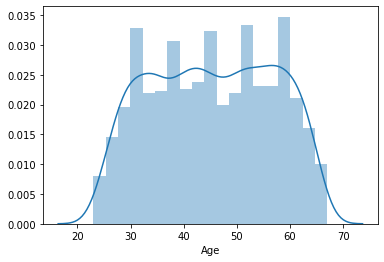

In [33]:
Age=loan_df['Age'].dropna()
sns.distplot(Age)         
plt.show()

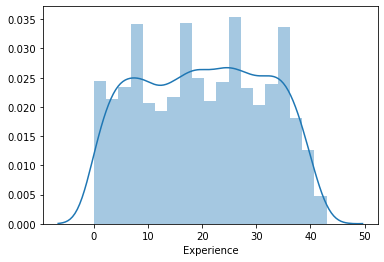

In [34]:
Exp=loan_df['Experience'].dropna()
sns.distplot(Exp)         
plt.show()

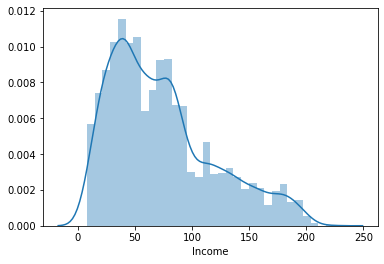

In [35]:
Inc=loan_df['Income'].dropna()
sns.distplot(Inc)         
plt.show()

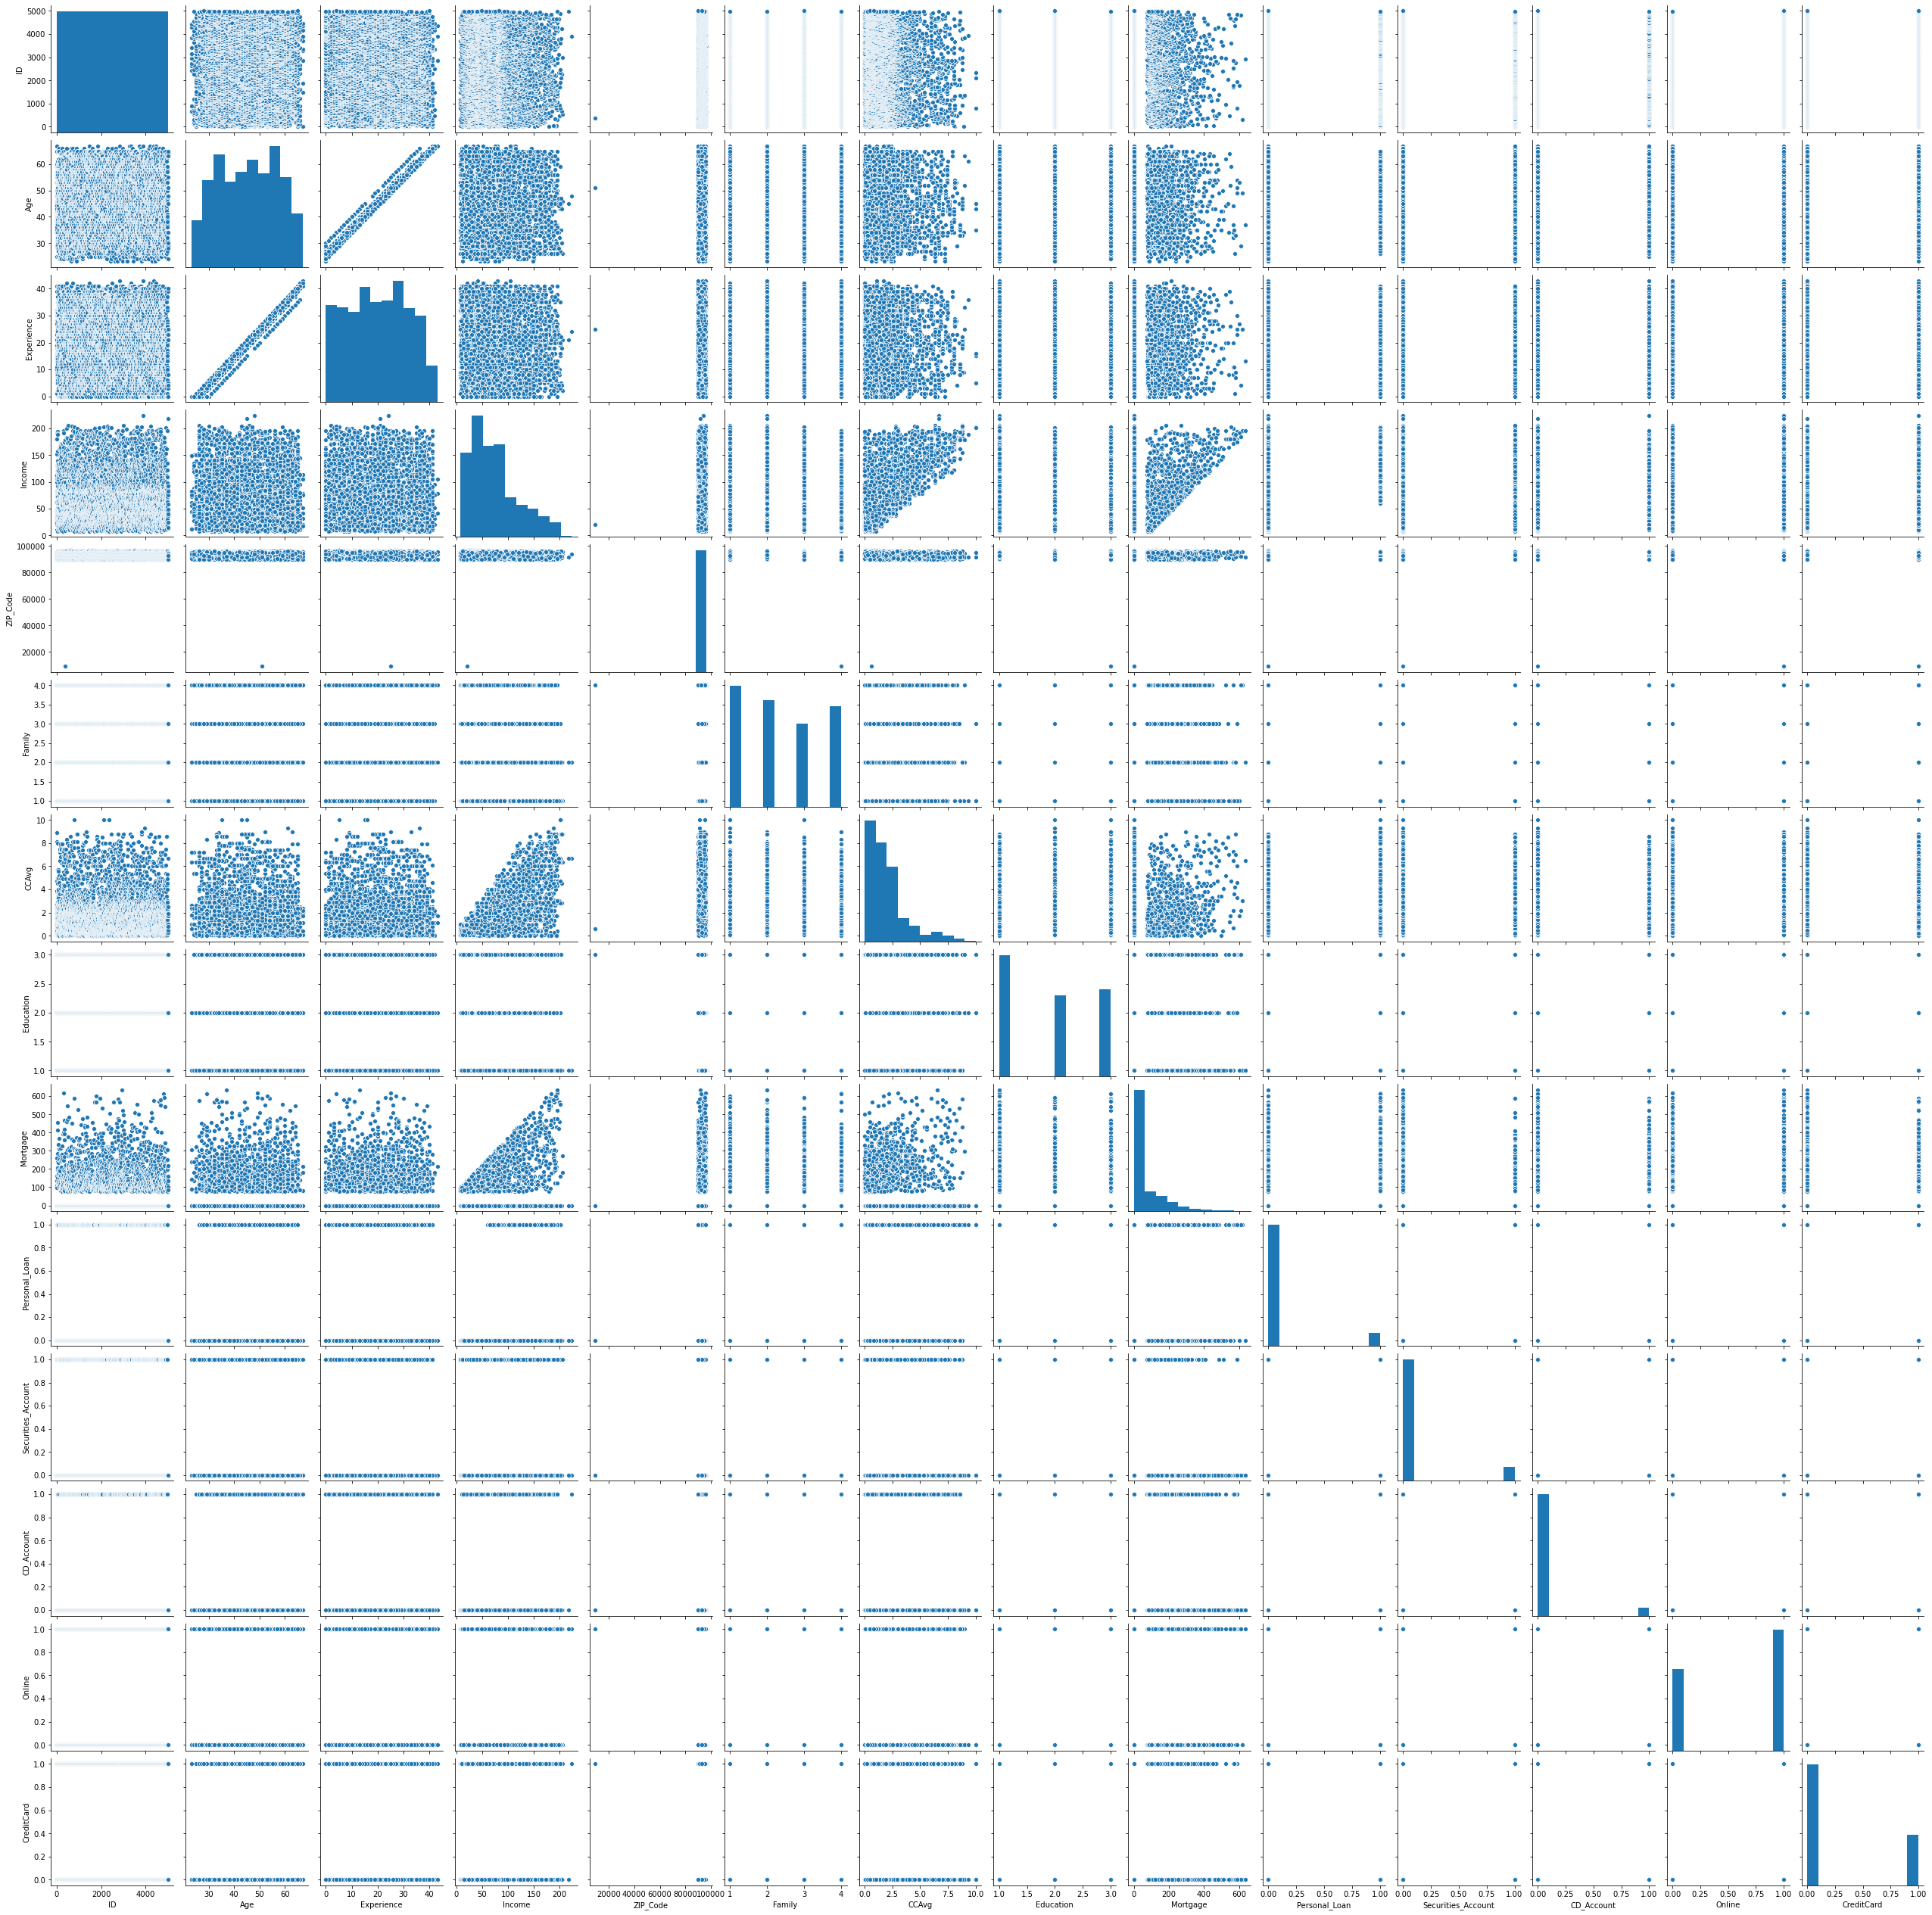

In [36]:
sns.pairplot(loan_df)

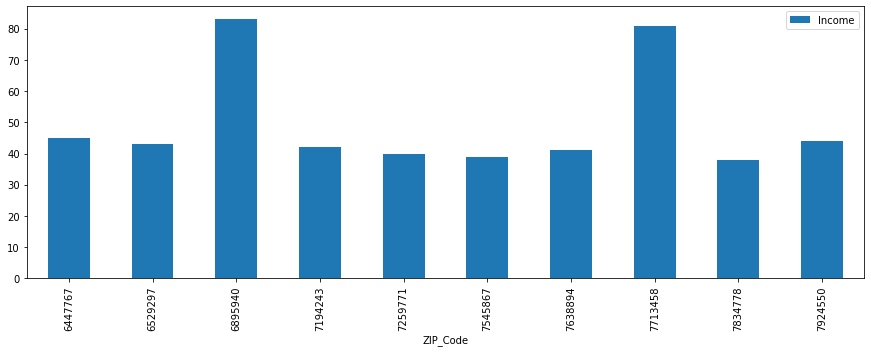

In [37]:
loan_df.groupby(by=['Income'])['ZIP_Code'].sum().reset_index().sort_values(['ZIP_Code']).tail(10).plot(x='ZIP_Code',
                                                                                                           y='Income',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

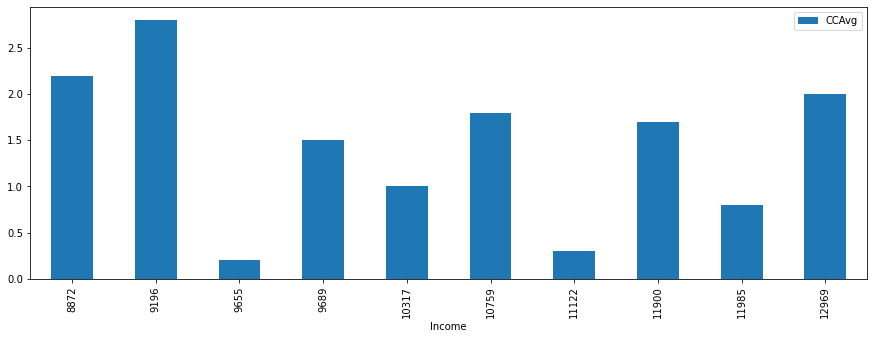

In [38]:
loan_df.groupby(by=['CCAvg'])['Income'].sum().reset_index().sort_values(['Income']).tail(10).plot(x='Income',
                                                                                                           y='CCAvg',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

In [39]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

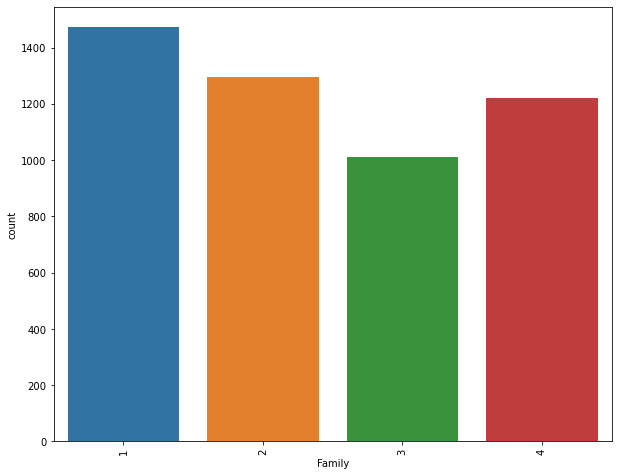

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(loan_df['Family'])
plt.xticks(rotation=90)
plt.show()

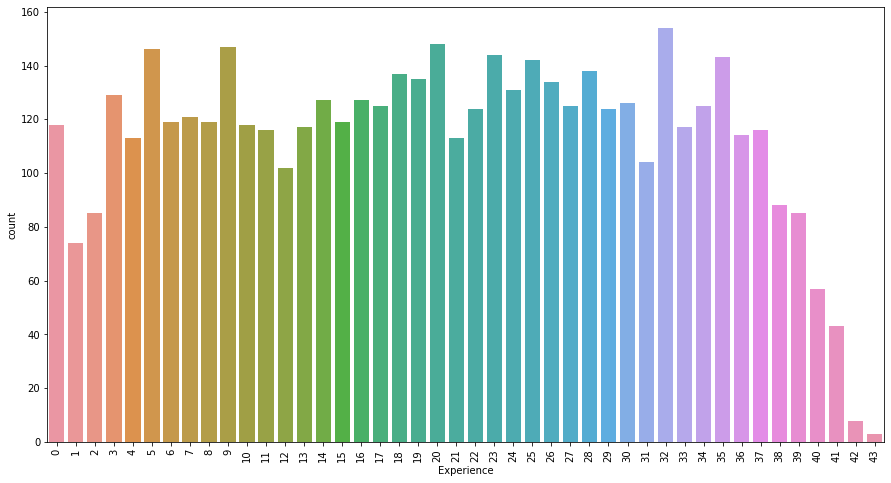

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(loan_df['Experience'])
plt.xticks(rotation=90)
plt.show()

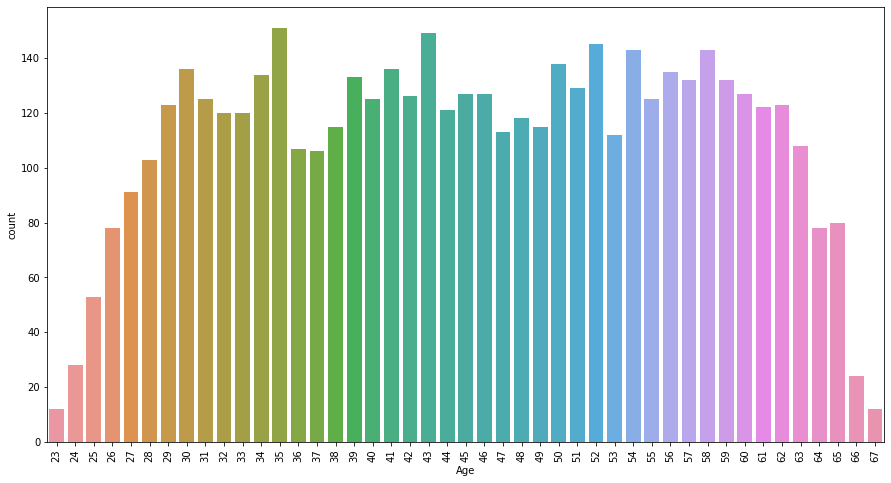

In [42]:
#plt.figure(figsize=(8,4))
#IncByEd = sns.barplot(x="Income", y="Education", data=loan_df)
plt.figure(figsize=(15,8))
sns.countplot(loan_df['Age'])
plt.xticks(rotation=90)
plt.show()

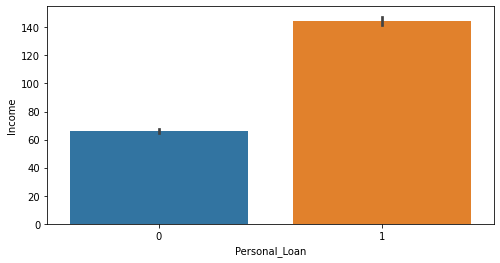

In [43]:
plt.figure(figsize=(8,4))
PLoanByInc = sns.barplot(x="Personal_Loan", y="Income", data=loan_df)

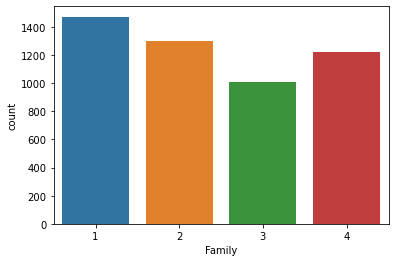

In [44]:
sns.countplot(loan_df['Family'])
plt.show()

In [45]:
loan_df.drop(columns=['ID'],inplace=True) # dropping ID because it does not add value 

In [46]:
loan_df.head(2)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [47]:
loan_df.corr()   # displays correlation between all pairs of attributes as a df

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001111,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [48]:
loan_by_age = loan_df.groupby('Age').sum()
# Group by data based on age and sum of all the personal loand to find the number of personal loan by age group
loan_by_age = loan_by_age.drop(columns = 'ZIP_Code' ).T
# Dropping 'movie id' because it is not required here
loan_by_age

Age,23,24,25,26,27,28,29,30,31,32,...,58,59,60,61,62,63,64,65,66,67
Experience,0.00,0.0,18.00,76.00,175.00,307.00,460.00,661.00,694.00,822.00,...,4656.0,4488.0,4400.0,4352.00,4530.00,4065.00,3030.00,3185.00,981.00,502.0
Income,807.00,2078.0,3550.00,6556.00,7353.00,8340.00,9970.00,10511.00,8853.00,8835.00,...,9901.0,8986.0,8487.0,8211.00,8671.00,8107.00,5708.00,6709.00,1457.00,746.0
Family,36.00,72.0,153.00,210.00,243.00,267.00,322.00,341.00,284.00,292.00,...,351.0,320.0,291.0,296.00,280.00,252.00,181.00,193.00,56.00,34.0
CCAvg,30.13,56.8,95.23,178.82,158.73,190.14,238.51,262.91,244.13,254.91,...,277.9,245.7,234.0,221.82,206.77,215.81,121.34,156.57,28.37,15.6
Education,17.00,50.0,102.00,150.00,171.00,181.00,231.00,254.00,232.00,206.00,...,261.0,230.0,225.0,237.00,240.00,221.00,160.00,157.00,49.00,23.0
Mortgage,863.00,552.0,3181.00,4100.00,7573.00,5486.00,7504.00,7264.00,7594.00,7096.00,...,7236.0,5773.0,7526.0,5794.00,5603.00,7441.00,5134.00,4238.00,396.00,477.0
Personal_Loan,0.00,0.0,0.00,13.00,12.00,9.00,15.00,17.00,7.00,12.00,...,10.0,9.0,10.0,12.00,9.00,16.00,8.00,14.00,0.00,0.0
Securities_Account,2.00,4.0,6.00,7.00,14.00,8.00,3.00,14.00,9.00,19.00,...,9.0,12.0,17.0,9.00,14.00,7.00,12.00,7.00,3.00,2.0
CD_Account,0.00,0.0,1.00,4.00,6.00,4.00,3.00,7.00,8.00,16.00,...,6.0,6.0,4.0,8.00,7.00,3.00,7.00,11.00,2.00,1.0
Online,8.00,18.0,28.00,35.00,52.00,66.00,70.00,87.00,78.00,78.00,...,86.0,82.0,84.0,75.00,72.00,65.00,51.00,47.00,12.00,6.0


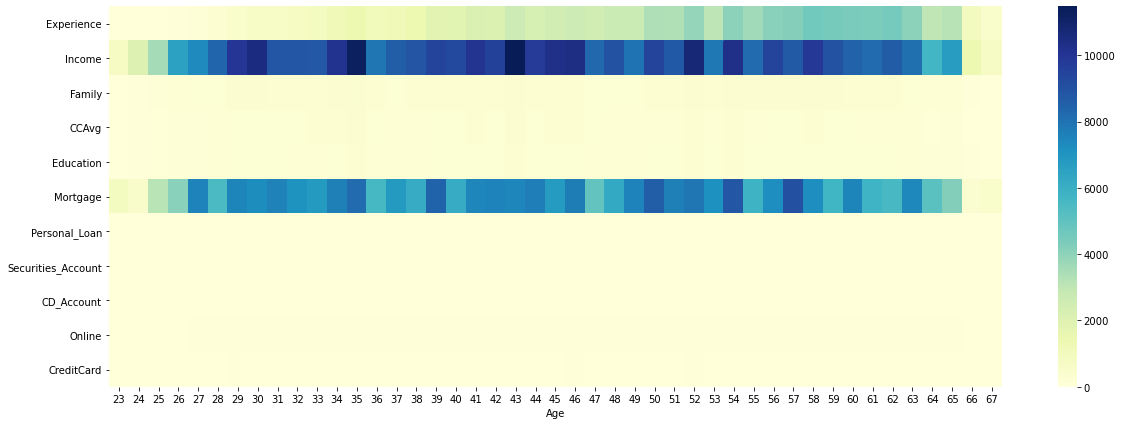

In [49]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(loan_by_age, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

# Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [50]:
loan_df.head(2)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [65]:
loan_df.shape

(5000, 13)

In [51]:
# Bank Prez says no offers to customers with income less than 100
loan_df = loan_df[loan_df['Income'] >= 100] 

In [52]:
loan_df.shape
# greatly reduced the rows & hopefully helps the model

(1222, 13)

In [53]:
loan_df_age = loan_df.copy() # in case i want to look by age

In [54]:
loan_df_ccavg = loan_df.copy() # in case i want to look by ccavg

In [56]:
loan_df['Income']

3       100
9       180
10      105
12      114
14      112
       ... 
4962    122
4964    110
4980    135
4981    195
4993    218
Name: Income, Length: 1222, dtype: int64

In [57]:
# Binning

bin_edges = [0, 100, 125, 150, 175, 200, 225]         # edges to define intervals
bin_labels = ['0-100', '101-125', '126-150','151-175', '176-200', '201-225']  # labels to denote each interval
loan_df['Income'] = pd.cut(loan_df['Income'], bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.

In [58]:
loan_df['Income']

3         0-100
9       176-200
10      101-125
12      101-125
14      101-125
         ...   
4962    101-125
4964    101-125
4980    126-150
4981    176-200
4993    201-225
Name: Income, Length: 1222, dtype: category
Categories (6, object): [0-100 < 101-125 < 126-150 < 151-175 < 176-200 < 201-225]

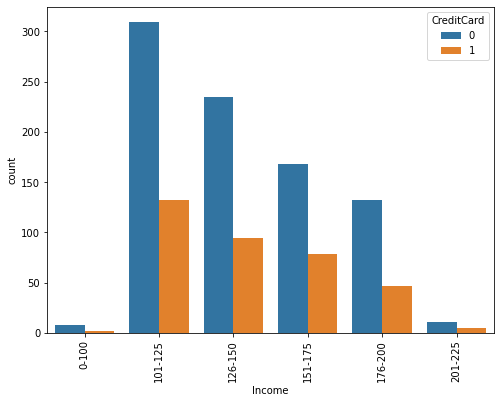

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Income',data=loan_df,hue='CreditCard')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

In [60]:
loan_df.groupby('Income')['CreditCard'].count()

Income
0-100       10
101-125    441
126-150    329
151-175    247
176-200    179
201-225     16
Name: CreditCard, dtype: int64

In [61]:
pd.crosstab(loan_df['Income'],loan_df['CreditCard'])
# displays the frequencies between the categories of two different features

CreditCard,0,1
Income,,
0-100,8,2
101-125,309,132
126-150,235,94
151-175,168,79
176-200,132,47
201-225,11,5


In [62]:
pd.crosstab(loan_df['Income'],loan_df['CreditCard'],normalize='columns')
# displays % distribution of each class in different interval of CreditAmount

CreditCard,0,1
Income,,
0-100,0.009270,0.005571
101-125,0.358053,0.367688
126-150,0.272306,0.261838
151-175,0.194670,0.220056
176-200,0.152955,0.130919
201-225,0.012746,0.013928


In [63]:
loan_df['Income'].unique()
# Displays all the unique value in the column

[0-100, 176-200, 101-125, 126-150, 151-175, 201-225]
Categories (6, object): [0-100 < 101-125 < 126-150 < 151-175 < 176-200 < 201-225]

In [64]:
# Converting categorical values
loan_df['Income'] = loan_df['Income'].cat.codes

In [65]:
loan_df['Income'].unique()

array([0, 4, 1, 2, 3, 5], dtype=int8)

In [66]:
#separating dependent and independent variables
X = loan_df.drop("CreditCard",axis=1)
Y = loan_df.CreditCard.astype('category')

In [67]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state =1 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.484242
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.186     
Dependent Variable:  CreditCard       AIC:              854.0531  
Date:                2020-09-18 16:20 BIC:              915.8174  
No. Observations:    855              Log-Likelihood:   -414.03   
Df Model:            12               LL-Null:          -508.48   
Df Residuals:        842              LLR p-value:      6.3116e-34
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const               1.8394   4.9621  0.3707 0.7109 -7.8862 11.5649
Age                -0.1744   0.0921 -1.8929 0.0584 -0.3550  0.0062
Experience          0.1831   0.0929  1.9714 0.0487  0.0011  0.3651
Income             -0.0024   0.0856 -0.0276 0.9780 -0.1701  0.1654
ZIP_Code            0.0000   0.0000  0.3310 0.7406 -0.0001  0.0001
Family              0.0381   0.1017  0.3742 0.7083 -0.1613  0.2374
CCAvg              -0.0197   0.0394 -0.5007 0.6166 -0.0968  0.0574
Education           0.1685   0.1479  1.1391 0.2547 -0.1214  0.4584
Mortgage           -0.0007   0.0006 -1.1728 0.2409 -0.0019  0.0005
Personal_Loan      -1.3561   0.2995 -4.5285 0.0000 -1.9431 -0.7692
Securities_Account -2.1378   0.4098 -5.2164 0.0000 -2.9410 -1.3345
CD_Account          4.1110   0.3856 10.6605 0.0000  3.3552  4.8668
Online             -0.5089   0.1811 -2.8111 0.0049 -0.8638 -0.1541
==================================================================

"""

In [68]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

# logit function to predict probaility of output being from class '1'
y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## thershold is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
4292,0,0.135403,0
2061,0,0.153432,0
557,1,0.386835,0
3609,1,0.342009,0
2196,0,0.070020,0


In [69]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

LogisticRegression(random_state=7)

In [70]:
z = pd.DataFrame()
# output of target variable
z['Actual'] = y_test.values                                 
z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]
# Predicting target
z['Predicted'] = lr.predict(X_test)                               

z.head()


,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.690837,0.309163,0
1,0,0.684546,0.315454,0
2,1,0.729651,0.270349,0
3,1,0.745937,0.254063,0
4,0,0.709553,0.290447,0


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [72]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Convert", "No Convert"] , yticklabels = ["Convert", "No Convert"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

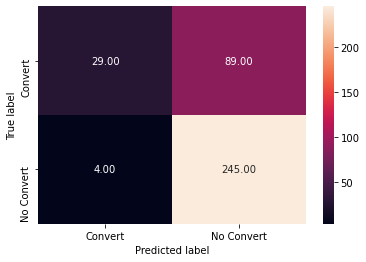

In [73]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [74]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 5 ) )

Total Accuracy :  0.74659


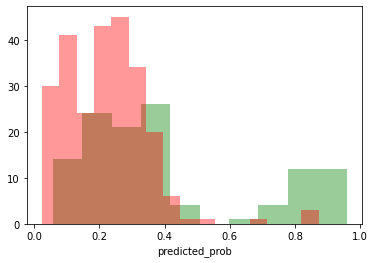

In [75]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'g' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'r' )
plt.show()

Based on the criteria that the level of income and the fact that they have a credit card predicts by this model that 29 of the offers will be accepted with an accuracy of 75%

In [76]:
loan_df_age.head(2)

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [77]:
loan_df_age.shape

(1222, 13)

In [78]:
loan_df_age['Age']

3       35
9       34
10      65
12      48
14      67
        ..
4962    46
4964    53
4980    29
4981    34
4993    45
Name: Age, Length: 1222, dtype: int64

In [79]:
# Binning
# 0-30 < 31-50 < 51-70 < 71-100
bin_edges = [0, 30, 50, 70, 100]         # edges to define intervals
bin_labels = ['0-30', '31-50', '51-70','71-100']  # labels to denote each interval
loan_df_age['Age'] = pd.cut(loan_df_age['Age'], bins=bin_edges , labels=bin_labels)

In [80]:
loan_df_age['Age']

3       31-50
9       31-50
10      51-70
12      31-50
14      51-70
        ...  
4962    31-50
4964    51-70
4980     0-30
4981    31-50
4993    31-50
Name: Age, Length: 1222, dtype: category
Categories (4, object): [0-30 < 31-50 < 51-70 < 71-100]

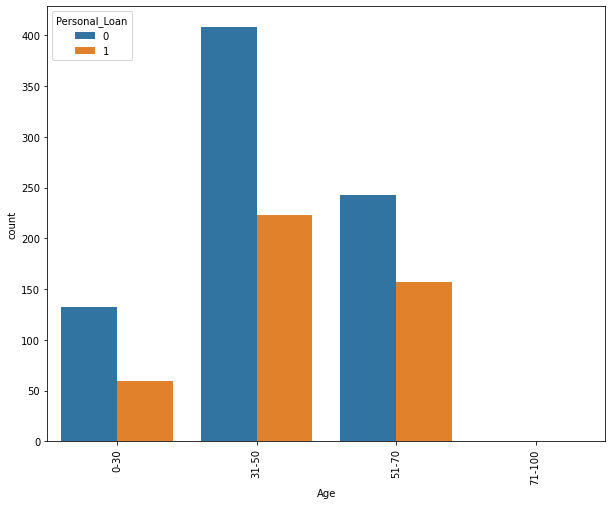

In [89]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Age',data=loan_df_age,hue='Personal_Loan')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

In [90]:
loan_df_age.groupby('Age')['Personal_Loan'].count()

Age
0-30      191
31-50     631
51-70     400
71-100      0
Name: Personal_Loan, dtype: int64

In [91]:
pd.crosstab(loan_df['Age'],loan_df['Personal_Loan'])
# displays the frequencies between the categories of two different features
# looks like the 1 column data is not correct with 0's in the "yes" cloumn

Personal_Loan,0,1
Age,,
23,2,0
24,7,0
25,13,0
26,12,11
27,20,11
28,25,8
29,29,14
30,24,15
31,23,6


In [93]:
pd.crosstab(loan_df_age['Age'],loan_df_age['Personal_Loan'])
# displays the frequencies between the categories of two different features

Personal_Loan,0,1
Age,,
0-30,132,59
31-50,408,223
51-70,243,157


In [94]:
pd.crosstab(loan_df_age['Age'],loan_df_age['Personal_Loan'],normalize='columns')
# displays % distribution of each class in different interval of CreditAmount

Personal_Loan,0,1
Age,,
0-30,0.168582,0.134396
31-50,0.521073,0.507973
51-70,0.310345,0.357631


In [100]:
loan_df_age['Age'].unique()
# Displays all the unique value in the column

[31-50, 51-70, 0-30]
Categories (3, object): [0-30 < 31-50 < 51-70]

In [101]:
#separating dependent and independent variables
X = loan_df.drop("Personal_Loan",axis=1)
Y = loan_df.Personal_Loan.astype('category')

In [102]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state =1 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.293843
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit            Pseudo R-squared: 0.552      
Dependent Variable:   Personal_Loan    AIC:              528.4721   
Date:                 2020-09-18 16:53 BIC:              590.2364   
No. Observations:     855              Log-Likelihood:   -251.24    
Df Model:             12               LL-Null:          -561.04    
Df Residuals:         842              LLR p-value:      6.8433e-125
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       8.0000                                        
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
const              -15.3532   6.6157 -2.3207 0.0203 -28.3198 -2.3866
Age                  0.1550   0.1222  1.2677 0.2049  -0.0846  0.3946
Experience          -0.1457   0.1225 -1.1891 0.2344  -0.3858  0.0944
Income               0.8260   0.1172  7.0474 0.0000   0.5963  1.0557
ZIP_Code             0.0000   0.0001  0.4926 0.6223  -0.0001  0.0002
Family               0.9938   0.1226  8.1062 0.0000   0.7535  1.2341
CCAvg                0.0679   0.0543  1.2506 0.2111  -0.0385  0.1744
Education            2.1902   0.1752 12.5043 0.0000   1.8469  2.5335
Mortgage             0.0010   0.0008  1.3266 0.1846  -0.0005  0.0025
Securities_Account  -0.7391   0.4510 -1.6388 0.1013  -1.6231  0.1449
CD_Account           4.0011   0.5403  7.4050 0.0000   2.9421  5.0602
Online              -0.4723   0.2471 -1.9111 0.0560  -0.9567  0.0121
CreditCard          -1.7094   0.3589 -4.7626 0.0000  -2.4129 -1.0059
====================================================================

"""

In [103]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

# logit function to predict probaility of output being from class '1'
y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## thershold is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
4292,1,0.988188,1
2061,1,0.960549,1
557,0,0.006715,0
3609,0,0.013367,0
2196,1,0.974520,1


In [104]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

LogisticRegression(random_state=7)

In [105]:
z = pd.DataFrame()
# output of target variable
z['Actual'] = y_test.values                                 
z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]
# Predicting target
z['Predicted'] = lr.predict(X_test)                               

z.head()


,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,1,0.605728,0.394272,0
1,1,0.629776,0.370224,0
2,0,0.659637,0.340363,0
3,0,0.658105,0.341895,0
4,1,0.659768,0.340232,0


In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [107]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Convert", "No Convert"] , yticklabels = ["Convert", "No Convert"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

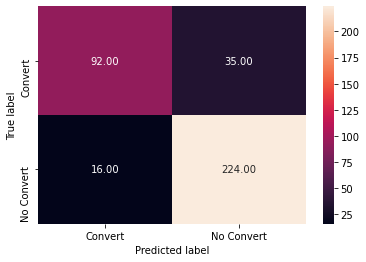

In [108]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [110]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.86


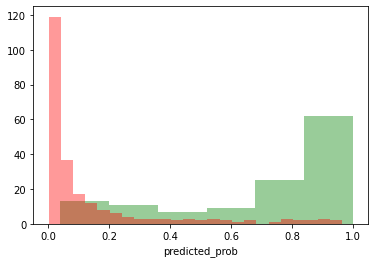

In [111]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'g' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'r' )
plt.show()

Conclusions:

Based on the criteria that the level of income and the fact that they have a credit card predicts by this model that 29 of the offers will be accepted with an accuracy of 75%

Based on the criteria that the level of age and the fact that they have a personal loan predicts by this model that 92 of the offers will be accepted with an accuracy of 86%

If you rely on this test, it would appear that age and personal loans have a better corrolation to this prediction than income and having a credit card. This is not always true and further analysis could be done.